# LeNet Implementation

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets

### Prepare CIFAR-10 Dataset

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
cifar_trainset = datasets.CIFAR10(root='/Users/jaidevmirchandani/Documents/COGS181', train=True, download=True, transform=transform)

Files already downloaded and verified


In [ ]:
cifar_testset = datasets.CIFAR10(root='/Users/jaidevmirchandani/Documents/COGS181', train=False, download=True, transform=transform)

Files already downloaded and verified


In [ ]:
trainloader = torch.utils.data.DataLoader(cifar_trainset, batch_size=6,shuffle=True, num_workers=2)

In [ ]:
testloader = torch.utils.data.DataLoader(cifar_testset, batch_size=6,shuffle=False, num_workers=2)

In [ ]:
classes = cifar_trainset.classes

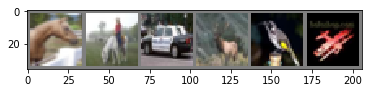

horse horse automobile  deer  bird airplane


In [ ]:
# The function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(trainloader)
images, labels = dataiter.next()
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(6)))

### Choose a device

In [ ]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
# If 'cuda:0' is printed, it means GPU is available.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  

cuda:0


### Build LeNet Architecture

In the following pieces of code, I have used a Kernel size of 5x5 applied at a stride of 1. Furthermore, the pooling layers are of dimensions 2x2 and are applied at a stride of 2.

#### 1. Average Pooling, ReLU activation function, Stochastic Gradient Descent optimization method

In [ ]:
class LeNet1(nn.Module):
    
    def __init__(self):
        super(LeNet1, self).__init__()
        
        #3 input channels, 6 output channels, 5x5 kernel size
        self.convolution1 = nn.Conv2d(3,6,5)
        
        #6 input channels, 16 output channels, 5x5 kernel size
        self.convolution2 = nn.Conv2d(6,16,5)
        
        #400 inputs
        self.fullyconnected1 = nn.Linear(400,120)
        
        #120 inputs
        self.fullyconnected2 = nn.Linear(120,84)
        
        #84 inputs
        self.fullyconnected3 = nn.Linear(84,10)
    
    def forward(self,x):
        
        #ReLU non-linearity in convolution 1
        output = F.relu(self.convolution1(x))
        
        #Average Pooling with
        output = F.avg_pool2d(output,2)
        
        #ReLU non-linearity in convolution 2
        output = F.relu(self.convolution2(output))
        
        #Average Pooling with
        output = F.avg_pool2d(output,2)
        
        
        output = output.view(output.size(0), -1)
        
        
        output = F.relu(self.fullyconnected1(output))
        
        
        output = F.relu(self.fullyconnected2(output))
        
        
        output = self.fullyconnected3(output)
        
        
        return output
    
lenet1 = LeNet1()     # Create the network instance.
lenet1.to(device)  # Move the network parameters to the specified device.

LeNet1(
  (convolution1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (convolution2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fullyconnected1): Linear(in_features=400, out_features=120, bias=True)
  (fullyconnected2): Linear(in_features=120, out_features=84, bias=True)
  (fullyconnected3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(lenet1.parameters(), lr=0.001, momentum=0.9)

### Training Procedure

In [ ]:
avg_losses = []
epochs = 10
print_freq = 100

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = lenet1(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.302
[epoch: 0, i:   199] avg mini-batch loss: 2.302
[epoch: 0, i:   299] avg mini-batch loss: 2.303
[epoch: 0, i:   399] avg mini-batch loss: 2.305
[epoch: 0, i:   499] avg mini-batch loss: 2.304
[epoch: 0, i:   599] avg mini-batch loss: 2.302
[epoch: 0, i:   699] avg mini-batch loss: 2.302
[epoch: 0, i:   799] avg mini-batch loss: 2.303
[epoch: 0, i:   899] avg mini-batch loss: 2.301
[epoch: 0, i:   999] avg mini-batch loss: 2.302
[epoch: 0, i:  1099] avg mini-batch loss: 2.299
[epoch: 0, i:  1199] avg mini-batch loss: 2.301
[epoch: 0, i:  1299] avg mini-batch loss: 2.300
[epoch: 0, i:  1399] avg mini-batch loss: 2.299
[epoch: 0, i:  1499] avg mini-batch loss: 2.297
[epoch: 0, i:  1599] avg mini-batch loss: 2.295
[epoch: 0, i:  1699] avg mini-batch loss: 2.292
[epoch: 0, i:  1799] avg mini-batch loss: 2.285
[epoch: 0, i:  1899] avg mini-batch loss: 2.278
[epoch: 0, i:  1999] avg mini-batch loss: 2.264
[epoch: 0, i:  2099] avg mini-batch loss

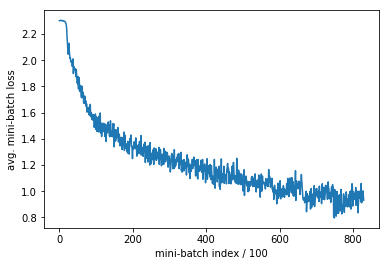

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

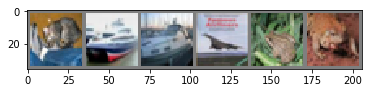

GroundTruth:    cat  ship  ship airplane
Predicted:    cat  ship airplane airplane


In [ ]:
# Check several images.
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = lenet1(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet1(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of airplane : 67 %
Accuracy of automobile : 75 %
Accuracy of  bird : 53 %
Accuracy of   cat : 46 %
Accuracy of  deer : 53 %
Accuracy of   dog : 44 %
Accuracy of  frog : 74 %
Accuracy of horse : 63 %
Accuracy of  ship : 76 %
Accuracy of truck : 70 %


#### 2. Average Pooling, Sigmoid activation function, Stochastic Gradient Descent optimization method

In [ ]:
class LeNet2(nn.Module):
    
    def __init__(self):
        super(LeNet2, self).__init__()
        
        #3 input channels, 6 output channels, 5x5 kernel size
        self.convolution1 = nn.Conv2d(3,6,5)
        
        #6 input channels, 16 output channels, 5x5 kernel size
        self.convolution2 = nn.Conv2d(6,16,5)
        
        #400 inputs
        self.fullyconnected1 = nn.Linear(400,120)
        
        #120 inputs
        self.fullyconnected2 = nn.Linear(120,84)
        
        #84 inputs
        self.fullyconnected3 = nn.Linear(84,10)
    
    def forward(self,x):
        
        #ReLU non-linearity in convolution 1
        output = F.sigmoid(self.convolution1(x))
        
        #Average Pooling with
        output = F.avg_pool2d(output,2)
        
        #ReLU non-linearity in convolution 2
        output = F.sigmoid(self.convolution2(output))
        
        #Average Pooling with
        output = F.avg_pool2d(output,2)
        
        
        output = output.view(output.size(0), -1)
        
        
        output = F.sigmoid(self.fullyconnected1(output))
        
        
        output = F.sigmoid(self.fullyconnected2(output))
        
        
        output = self.fullyconnected3(output)
        
        
        return output
    
lenet2 = LeNet2()     # Create the network instance.
lenet2.to(device)  # Move the network parameters to the specified device.

LeNet2(
  (convolution1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (convolution2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fullyconnected1): Linear(in_features=400, out_features=120, bias=True)
  (fullyconnected2): Linear(in_features=120, out_features=84, bias=True)
  (fullyconnected3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(lenet2.parameters(), lr=0.001, momentum=0.9)

In [ ]:
avg_losses = []
epochs = 10
print_freq = 100

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = lenet2(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[epoch: 0, i:    99] avg mini-batch loss: 2.305
[epoch: 0, i:   199] avg mini-batch loss: 2.308
[epoch: 0, i:   299] avg mini-batch loss: 2.310
[epoch: 0, i:   399] avg mini-batch loss: 2.309
[epoch: 0, i:   499] avg mini-batch loss: 2.317
[epoch: 0, i:   599] avg mini-batch loss: 2.311
[epoch: 0, i:   699] avg mini-batch loss: 2.315
[epoch: 0, i:   799] avg mini-batch loss: 2.308
[epoch: 0, i:   899] avg mini-batch loss: 2.316
[epoch: 0, i:   999] avg mini-batch loss: 2.314
[epoch: 0, i:  1099] avg mini-batch loss: 2.310
[epoch: 0, i:  1199] avg mini-batch loss: 2.306
[epoch: 0, i:  1299] avg mini-batch loss: 2.313
[epoch: 0, i:  1399] avg mini-batch loss: 2.308
[epoch: 0, i:  1499] avg mini-batch loss: 2.314
[epoch: 0, i:  1599] avg mini-batch loss: 2.312
[epoch: 0, i:  1699] avg mini-batch loss: 2.315
[epoch: 0, i:  1799] avg mini-batch loss: 2.314
[epoch: 0, i:  1899] avg mini-batch loss: 2.310
[epoch: 0, i:  1999] avg mini-batch loss: 2.305
[epoch: 0, i:  2099] avg mini-batch loss

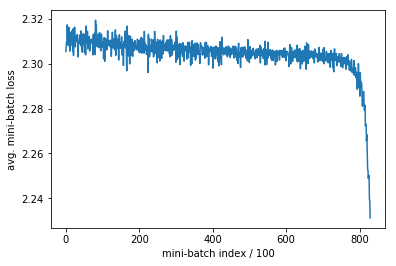

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

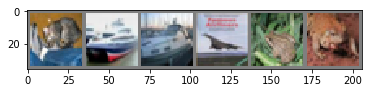

GroundTruth:    cat  ship  ship airplane
Predicted:   frog  ship  ship  ship


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
# Check several images.
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = lenet2(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy of the network on the 10000 test images: 16 %


In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet2(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy of airplane :  0 %
Accuracy of automobile :  0 %
Accuracy of  bird :  1 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog : 81 %
Accuracy of horse :  0 %
Accuracy of  ship : 85 %
Accuracy of truck :  0 %


#### 3. Max Pooling, ReLU activation function, Stochastic Gradient Descent optimization

In [ ]:
class LeNet3(nn.Module):
    
    def __init__(self):
        super(LeNet3, self).__init__()
        
        #3 input channels, 6 output channels, 5x5 kernel size
        self.convolution1 = nn.Conv2d(3,6,5)
        
        #6 input channels, 16 output channels, 5x5 kernel size
        self.convolution2 = nn.Conv2d(6,16,5)
        
        #400 inputs
        self.fullyconnected1 = nn.Linear(400,120)
        
        #120 inputs
        self.fullyconnected2 = nn.Linear(120,84)
        
        #84 inputs
        self.fullyconnected3 = nn.Linear(84,10)
    
    def forward(self,x):
        
        #ReLU non-linearity in convolution 1
        output = F.relu(self.convolution1(x))
        
        #Average Pooling with
        output = F.max_pool2d(output,2)
        
        #ReLU non-linearity in convolution 2
        output = F.relu(self.convolution2(output))
        
        #Average Pooling with
        output = F.max_pool2d(output,2)
        
        
        output = output.view(output.size(0), -1)
        
        
        output = F.relu(self.fullyconnected1(output))
        
        
        output = F.relu(self.fullyconnected2(output))
        
        
        output = self.fullyconnected3(output)
        
        
        return output
    
lenet3 = LeNet3()     # Create the network instance.
lenet3.to(device)  # Move the network parameters to the specified device.

LeNet3(
  (convolution1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (convolution2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fullyconnected1): Linear(in_features=400, out_features=120, bias=True)
  (fullyconnected2): Linear(in_features=120, out_features=84, bias=True)
  (fullyconnected3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(lenet3.parameters(), lr=0.001, momentum=0.9)

In [ ]:
avg_losses = []
epochs = 10
print_freq = 100

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = lenet3(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.308
[epoch: 0, i:   199] avg mini-batch loss: 2.299
[epoch: 0, i:   299] avg mini-batch loss: 2.303
[epoch: 0, i:   399] avg mini-batch loss: 2.300
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 0, i:   599] avg mini-batch loss: 2.301
[epoch: 0, i:   699] avg mini-batch loss: 2.301
[epoch: 0, i:   799] avg mini-batch loss: 2.301
[epoch: 0, i:   899] avg mini-batch loss: 2.294
[epoch: 0, i:   999] avg mini-batch loss: 2.290
[epoch: 0, i:  1099] avg mini-batch loss: 2.283
[epoch: 0, i:  1199] avg mini-batch loss: 2.262
[epoch: 0, i:  1299] avg mini-batch loss: 2.230
[epoch: 0, i:  1399] avg mini-batch loss: 2.175
[epoch: 0, i:  1499] avg mini-batch loss: 2.143
[epoch: 0, i:  1599] avg mini-batch loss: 2.139
[epoch: 0, i:  1699] avg mini-batch loss: 2.104
[epoch: 0, i:  1799] avg mini-batch loss: 2.099
[epoch: 0, i:  1899] avg mini-batch loss: 2.051
[epoch: 0, i:  1999] avg mini-batch loss: 2.022
[epoch: 0, i:  2099] avg mini-batch loss

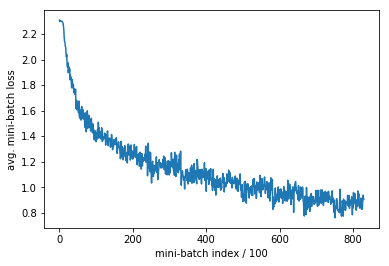

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

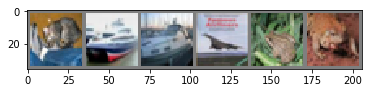

GroundTruth:    cat  ship  ship airplane
Predicted:    cat  ship  ship airplane


In [ ]:
# Check several images.
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = lenet3(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet3(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of airplane : 61 %
Accuracy of automobile : 74 %
Accuracy of  bird : 52 %
Accuracy of   cat : 32 %
Accuracy of  deer : 66 %
Accuracy of   dog : 53 %
Accuracy of  frog : 62 %
Accuracy of horse : 67 %
Accuracy of  ship : 80 %
Accuracy of truck : 68 %


#### 4. Max Pooling, Sigmoid activation function, Stochastic Gradient Descent optimization

In [ ]:
class LeNet4(nn.Module):
    
    def __init__(self):
        super(LeNet4, self).__init__()
        
        #3 input channels, 6 output channels, 5x5 kernel size
        self.convolution1 = nn.Conv2d(3,6,5)
        
        #6 input channels, 16 output channels, 5x5 kernel size
        self.convolution2 = nn.Conv2d(6,16,5)
        
        #400 inputs
        self.fullyconnected1 = nn.Linear(400,120)
        
        #120 inputs
        self.fullyconnected2 = nn.Linear(120,84)
        
        #84 inputs
        self.fullyconnected3 = nn.Linear(84,10)
    
    def forward(self,x):
        
        #ReLU non-linearity in convolution 1
        output = F.sigmoid(self.convolution1(x))
        
        #Average Pooling with
        output = F.max_pool2d(output,2)
        
        #ReLU non-linearity in convolution 2
        output = F.sigmoid(self.convolution2(output))
        
        #Average Pooling with
        output = F.max_pool2d(output,2)
        
        
        output = output.view(output.size(0), -1)
        
        
        output = F.sigmoid(self.fullyconnected1(output))
        
        
        output = F.sigmoid(self.fullyconnected2(output))
        
        
        output = self.fullyconnected3(output)
        
        
        return output
    
lenet4 = LeNet4()     # Create the network instance.
lenet4.to(device)  # Move the network parameters to the specified device.

LeNet4(
  (convolution1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (convolution2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fullyconnected1): Linear(in_features=400, out_features=120, bias=True)
  (fullyconnected2): Linear(in_features=120, out_features=84, bias=True)
  (fullyconnected3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(lenet4.parameters(), lr=0.001, momentum=0.9)

In [ ]:
avg_losses = []
epochs = 10
print_freq = 100

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = lenet4(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[epoch: 0, i:    99] avg mini-batch loss: 2.315
[epoch: 0, i:   199] avg mini-batch loss: 2.312
[epoch: 0, i:   299] avg mini-batch loss: 2.313
[epoch: 0, i:   399] avg mini-batch loss: 2.308
[epoch: 0, i:   499] avg mini-batch loss: 2.308
[epoch: 0, i:   599] avg mini-batch loss: 2.305
[epoch: 0, i:   699] avg mini-batch loss: 2.315
[epoch: 0, i:   799] avg mini-batch loss: 2.311
[epoch: 0, i:   899] avg mini-batch loss: 2.313
[epoch: 0, i:   999] avg mini-batch loss: 2.314
[epoch: 0, i:  1099] avg mini-batch loss: 2.312
[epoch: 0, i:  1199] avg mini-batch loss: 2.307
[epoch: 0, i:  1299] avg mini-batch loss: 2.310
[epoch: 0, i:  1399] avg mini-batch loss: 2.315
[epoch: 0, i:  1499] avg mini-batch loss: 2.311
[epoch: 0, i:  1599] avg mini-batch loss: 2.314
[epoch: 0, i:  1699] avg mini-batch loss: 2.314
[epoch: 0, i:  1799] avg mini-batch loss: 2.306
[epoch: 0, i:  1899] avg mini-batch loss: 2.316
[epoch: 0, i:  1999] avg mini-batch loss: 2.310
[epoch: 0, i:  2099] avg mini-batch loss

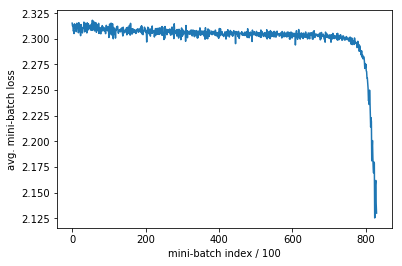

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

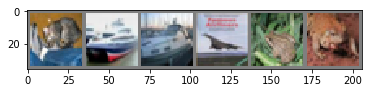

GroundTruth:    cat  ship  ship airplane
Predicted:   frog airplane airplane airplane


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
# Check several images.
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = lenet4(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy of the network on the 10000 test images: 18 %


In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet4(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy of airplane : 79 %
Accuracy of automobile :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  4 %
Accuracy of   dog :  0 %
Accuracy of  frog : 84 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck : 15 %


#### 5. Average Pooling, ReLU activation, Adam optimization

In [ ]:
class LeNet5(nn.Module):
    
    def __init__(self):
        super(LeNet5, self).__init__()
        
        #3 input channels, 6 output channels, 5x5 kernel size
        self.convolution1 = nn.Conv2d(3,6,5)
        
        #6 input channels, 16 output channels, 5x5 kernel size
        self.convolution2 = nn.Conv2d(6,16,5)
        
        #400 inputs
        self.fullyconnected1 = nn.Linear(400,120)
        
        #120 inputs
        self.fullyconnected2 = nn.Linear(120,84)
        
        #84 inputs
        self.fullyconnected3 = nn.Linear(84,10)
    
    def forward(self,x):
        
        #ReLU non-linearity in convolution 1
        output = F.relu(self.convolution1(x))
        
        #Average Pooling with
        output = F.avg_pool2d(output,2)
        
        #ReLU non-linearity in convolution 2
        output = F.relu(self.convolution2(output))
        
        #Average Pooling with
        output = F.avg_pool2d(output,2)
        
        
        output = output.view(output.size(0), -1)
        
        
        output = F.relu(self.fullyconnected1(output))
        
        
        output = F.relu(self.fullyconnected2(output))
        
        
        output = self.fullyconnected3(output)
        
        
        return output
    
lenet5 = LeNet5()     # Create the network instance.
lenet5.to(device)  # Move the network parameters to the specified device.

LeNet5(
  (convolution1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (convolution2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fullyconnected1): Linear(in_features=400, out_features=120, bias=True)
  (fullyconnected2): Linear(in_features=120, out_features=84, bias=True)
  (fullyconnected3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.Adam(lenet5.parameters(), lr=0.001)

In [ ]:
avg_losses = []
epochs = 10
print_freq = 100

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = lenet5(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.257
[epoch: 0, i:   199] avg mini-batch loss: 2.098
[epoch: 0, i:   299] avg mini-batch loss: 2.036
[epoch: 0, i:   399] avg mini-batch loss: 1.993
[epoch: 0, i:   499] avg mini-batch loss: 1.892
[epoch: 0, i:   599] avg mini-batch loss: 1.881
[epoch: 0, i:   699] avg mini-batch loss: 1.874
[epoch: 0, i:   799] avg mini-batch loss: 1.761
[epoch: 0, i:   899] avg mini-batch loss: 1.794
[epoch: 0, i:   999] avg mini-batch loss: 1.724
[epoch: 0, i:  1099] avg mini-batch loss: 1.771
[epoch: 0, i:  1199] avg mini-batch loss: 1.731
[epoch: 0, i:  1299] avg mini-batch loss: 1.686
[epoch: 0, i:  1399] avg mini-batch loss: 1.712
[epoch: 0, i:  1499] avg mini-batch loss: 1.695
[epoch: 0, i:  1599] avg mini-batch loss: 1.685
[epoch: 0, i:  1699] avg mini-batch loss: 1.632
[epoch: 0, i:  1799] avg mini-batch loss: 1.654
[epoch: 0, i:  1899] avg mini-batch loss: 1.755
[epoch: 0, i:  1999] avg mini-batch loss: 1.724
[epoch: 0, i:  2099] avg mini-batch loss

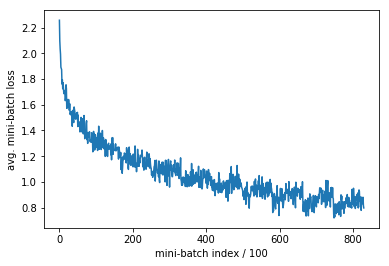

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

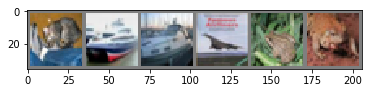

GroundTruth:    cat  ship  ship airplane
Predicted:    cat  ship  ship airplane


In [ ]:
# Check several images.
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = lenet5(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet5(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet5(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of airplane : 71 %
Accuracy of automobile : 76 %
Accuracy of  bird : 38 %
Accuracy of   cat : 37 %
Accuracy of  deer : 64 %
Accuracy of   dog : 53 %
Accuracy of  frog : 77 %
Accuracy of horse : 63 %
Accuracy of  ship : 77 %
Accuracy of truck : 62 %


#### 6. Average Pooling, Sigmoid Activation function, Adam optimization

In [ ]:
class LeNet6(nn.Module):
    
    def __init__(self):
        super(LeNet6, self).__init__()
        
        #3 input channels, 6 output channels, 5x5 kernel size
        self.convolution1 = nn.Conv2d(3,6,5)
        
        #6 input channels, 16 output channels, 5x5 kernel size
        self.convolution2 = nn.Conv2d(6,16,5)
        
        #400 inputs
        self.fullyconnected1 = nn.Linear(400,120)
        
        #120 inputs
        self.fullyconnected2 = nn.Linear(120,84)
        
        #84 inputs
        self.fullyconnected3 = nn.Linear(84,10)
    
    def forward(self,x):
        
        #ReLU non-linearity in convolution 1
        output = F.sigmoid(self.convolution1(x))
        
        #Average Pooling with
        output = F.avg_pool2d(output,2)
        
        #ReLU non-linearity in convolution 2
        output = F.sigmoid(self.convolution2(output))
        
        #Average Pooling with
        output = F.avg_pool2d(output,2)
        
        
        output = output.view(output.size(0), -1)
        
        
        output = F.sigmoid(self.fullyconnected1(output))
        
        
        output = F.sigmoid(self.fullyconnected2(output))
        
        
        output = self.fullyconnected3(output)
        
        
        return output
    
lenet6 = LeNet6()     # Create the network instance.
lenet6.to(device)  # Move the network parameters to the specified device.

LeNet6(
  (convolution1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (convolution2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fullyconnected1): Linear(in_features=400, out_features=120, bias=True)
  (fullyconnected2): Linear(in_features=120, out_features=84, bias=True)
  (fullyconnected3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.Adam(lenet6.parameters(), lr=0.001)

In [ ]:
avg_losses = []
epochs = 10
print_freq = 100

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = lenet6(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[epoch: 0, i:    99] avg mini-batch loss: 2.325
[epoch: 0, i:   199] avg mini-batch loss: 2.316
[epoch: 0, i:   299] avg mini-batch loss: 2.298
[epoch: 0, i:   399] avg mini-batch loss: 2.196
[epoch: 0, i:   499] avg mini-batch loss: 2.133
[epoch: 0, i:   599] avg mini-batch loss: 2.110
[epoch: 0, i:   699] avg mini-batch loss: 2.069
[epoch: 0, i:   799] avg mini-batch loss: 2.028
[epoch: 0, i:   899] avg mini-batch loss: 1.990
[epoch: 0, i:   999] avg mini-batch loss: 2.087
[epoch: 0, i:  1099] avg mini-batch loss: 2.008
[epoch: 0, i:  1199] avg mini-batch loss: 2.005
[epoch: 0, i:  1299] avg mini-batch loss: 2.036
[epoch: 0, i:  1399] avg mini-batch loss: 2.017
[epoch: 0, i:  1499] avg mini-batch loss: 1.967
[epoch: 0, i:  1599] avg mini-batch loss: 1.997
[epoch: 0, i:  1699] avg mini-batch loss: 2.006
[epoch: 0, i:  1799] avg mini-batch loss: 1.921
[epoch: 0, i:  1899] avg mini-batch loss: 1.976
[epoch: 0, i:  1999] avg mini-batch loss: 1.995
[epoch: 0, i:  2099] avg mini-batch loss

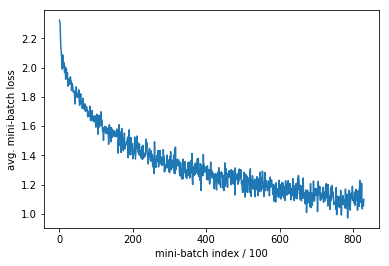

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

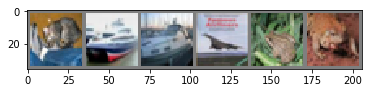

GroundTruth:    cat  ship  ship airplane
Predicted:    cat airplane automobile airplane


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
# Check several images.
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = lenet6(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]for j in range(4)))

In [ ]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet6(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy of the network on the 10000 test images: 56 %


In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet6(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy of airplane : 69 %
Accuracy of automobile : 62 %
Accuracy of  bird : 41 %
Accuracy of   cat : 36 %
Accuracy of  deer : 42 %
Accuracy of   dog : 49 %
Accuracy of  frog : 77 %
Accuracy of horse : 65 %
Accuracy of  ship : 65 %
Accuracy of truck : 59 %


#### 7. Max Pooling, ReLU activation, Adam optimization

In [ ]:
class LeNet7(nn.Module):
    
    def __init__(self):
        super(LeNet7, self).__init__()
        
        #3 input channels, 6 output channels, 5x5 kernel size
        self.convolution1 = nn.Conv2d(3,6,5)
        
        #6 input channels, 16 output channels, 5x5 kernel size
        self.convolution2 = nn.Conv2d(6,16,5)
        
        #400 inputs
        self.fullyconnected1 = nn.Linear(400,120)
        
        #120 inputs
        self.fullyconnected2 = nn.Linear(120,84)
        
        #84 inputs
        self.fullyconnected3 = nn.Linear(84,10)
    
    def forward(self,x):
        
        #ReLU non-linearity in convolution 1
        output = F.relu(self.convolution1(x))
        
        #Average Pooling with
        output = F.max_pool2d(output,2)
        
        #ReLU non-linearity in convolution 2
        output = F.relu(self.convolution2(output))
        
        #Average Pooling with
        output = F.max_pool2d(output,2)
        
        
        output = output.view(output.size(0), -1)
        
        
        output = F.relu(self.fullyconnected1(output))
        
        
        output = F.relu(self.fullyconnected2(output))
        
        
        output = self.fullyconnected3(output)
        
        
        return output
    
lenet7 = LeNet7()     # Create the network instance.
lenet7.to(device)  # Move the network parameters to the specified device.

LeNet7(
  (convolution1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (convolution2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fullyconnected1): Linear(in_features=400, out_features=120, bias=True)
  (fullyconnected2): Linear(in_features=120, out_features=84, bias=True)
  (fullyconnected3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.Adam(lenet7.parameters(), lr=0.001)

In [ ]:
avg_losses = []
epochs = 10
print_freq = 100

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = lenet7(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.254
[epoch: 0, i:   199] avg mini-batch loss: 2.040
[epoch: 0, i:   299] avg mini-batch loss: 2.034
[epoch: 0, i:   399] avg mini-batch loss: 1.952
[epoch: 0, i:   499] avg mini-batch loss: 1.861
[epoch: 0, i:   599] avg mini-batch loss: 1.761
[epoch: 0, i:   699] avg mini-batch loss: 1.743
[epoch: 0, i:   799] avg mini-batch loss: 1.880
[epoch: 0, i:   899] avg mini-batch loss: 1.717
[epoch: 0, i:   999] avg mini-batch loss: 1.735
[epoch: 0, i:  1099] avg mini-batch loss: 1.695
[epoch: 0, i:  1199] avg mini-batch loss: 1.676
[epoch: 0, i:  1299] avg mini-batch loss: 1.594
[epoch: 0, i:  1399] avg mini-batch loss: 1.655
[epoch: 0, i:  1499] avg mini-batch loss: 1.659
[epoch: 0, i:  1599] avg mini-batch loss: 1.649
[epoch: 0, i:  1699] avg mini-batch loss: 1.688
[epoch: 0, i:  1799] avg mini-batch loss: 1.668
[epoch: 0, i:  1899] avg mini-batch loss: 1.621
[epoch: 0, i:  1999] avg mini-batch loss: 1.615
[epoch: 0, i:  2099] avg mini-batch loss

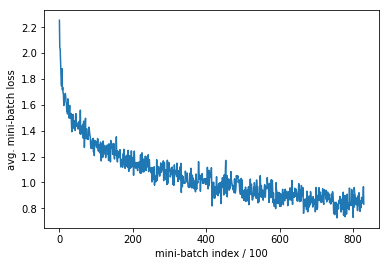

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

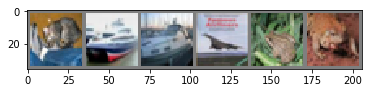

GroundTruth:    cat  ship  ship airplane
Predicted:    cat  ship  ship airplane


In [ ]:
# Check several images.
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = lenet7(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]for j in range(4)))

In [ ]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet7(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet7(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of airplane : 61 %
Accuracy of automobile : 74 %
Accuracy of  bird : 55 %
Accuracy of   cat : 41 %
Accuracy of  deer : 50 %
Accuracy of   dog : 51 %
Accuracy of  frog : 69 %
Accuracy of horse : 70 %
Accuracy of  ship : 83 %
Accuracy of truck : 71 %


#### 8. Max pooling, Sigmoid activation function, Adam optimization

In [ ]:
class LeNet8(nn.Module):
    
    def __init__(self):
        super(LeNet8, self).__init__()
        
        #3 input channels, 6 output channels, 5x5 kernel size
        self.convolution1 = nn.Conv2d(3,6,5)
        
        #6 input channels, 16 output channels, 5x5 kernel size
        self.convolution2 = nn.Conv2d(6,16,5)
        
        #400 inputs
        self.fullyconnected1 = nn.Linear(400,120)
        
        #120 inputs
        self.fullyconnected2 = nn.Linear(120,84)
        
        #84 inputs
        self.fullyconnected3 = nn.Linear(84,10)
    
    def forward(self,x):
        
        #ReLU non-linearity in convolution 1
        output = F.sigmoid(self.convolution1(x))
        
        #Average Pooling with
        output = F.max_pool2d(output,2)
        
        #ReLU non-linearity in convolution 2
        output = F.sigmoid(self.convolution2(output))
        
        #Average Pooling with
        output = F.max_pool2d(output,2)
        
        
        output = output.view(output.size(0), -1)
        
        
        output = F.sigmoid(self.fullyconnected1(output))
        
        
        output = F.sigmoid(self.fullyconnected2(output))
        
        
        output = self.fullyconnected3(output)
        
        
        return output
    
lenet8 = LeNet8()     # Create the network instance.
lenet8.to(device)  # Move the network parameters to the specified device.

LeNet8(
  (convolution1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (convolution2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fullyconnected1): Linear(in_features=400, out_features=120, bias=True)
  (fullyconnected2): Linear(in_features=120, out_features=84, bias=True)
  (fullyconnected3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.Adam(lenet8.parameters(), lr=0.001)

In [ ]:
avg_losses = []
epochs = 10
print_freq = 100

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = lenet8(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[epoch: 0, i:    99] avg mini-batch loss: 2.325
[epoch: 0, i:   199] avg mini-batch loss: 2.321
[epoch: 0, i:   299] avg mini-batch loss: 2.263
[epoch: 0, i:   399] avg mini-batch loss: 2.175
[epoch: 0, i:   499] avg mini-batch loss: 2.126
[epoch: 0, i:   599] avg mini-batch loss: 2.113
[epoch: 0, i:   699] avg mini-batch loss: 2.072
[epoch: 0, i:   799] avg mini-batch loss: 2.063
[epoch: 0, i:   899] avg mini-batch loss: 2.024
[epoch: 0, i:   999] avg mini-batch loss: 2.056
[epoch: 0, i:  1099] avg mini-batch loss: 2.055
[epoch: 0, i:  1199] avg mini-batch loss: 2.081
[epoch: 0, i:  1299] avg mini-batch loss: 2.008
[epoch: 0, i:  1399] avg mini-batch loss: 2.022
[epoch: 0, i:  1499] avg mini-batch loss: 2.095
[epoch: 0, i:  1599] avg mini-batch loss: 1.991
[epoch: 0, i:  1699] avg mini-batch loss: 1.975
[epoch: 0, i:  1799] avg mini-batch loss: 2.031
[epoch: 0, i:  1899] avg mini-batch loss: 1.900
[epoch: 0, i:  1999] avg mini-batch loss: 1.965
[epoch: 0, i:  2099] avg mini-batch loss

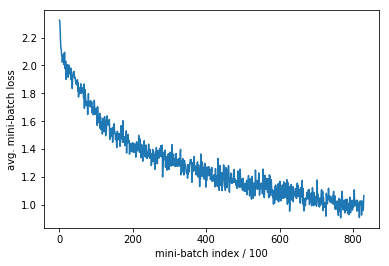

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

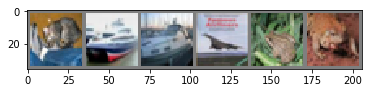

GroundTruth:    cat  ship  ship airplane
Predicted:    cat automobile automobile airplane


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
# Check several images.
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = lenet8(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]for j in range(4)))

In [ ]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet8(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy of the network on the 10000 test images: 60 %


In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet8(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy of airplane : 70 %
Accuracy of automobile : 66 %
Accuracy of  bird : 57 %
Accuracy of   cat : 46 %
Accuracy of  deer : 52 %
Accuracy of   dog : 35 %
Accuracy of  frog : 68 %
Accuracy of horse : 68 %
Accuracy of  ship : 68 %
Accuracy of truck : 71 %
